In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [ ]:
data = pd.read_csv("dataset-q-1.csv", header=None)

In [ ]:
X = data.drop(2, axis=1)
y = data[2]

#**With Default parameters**

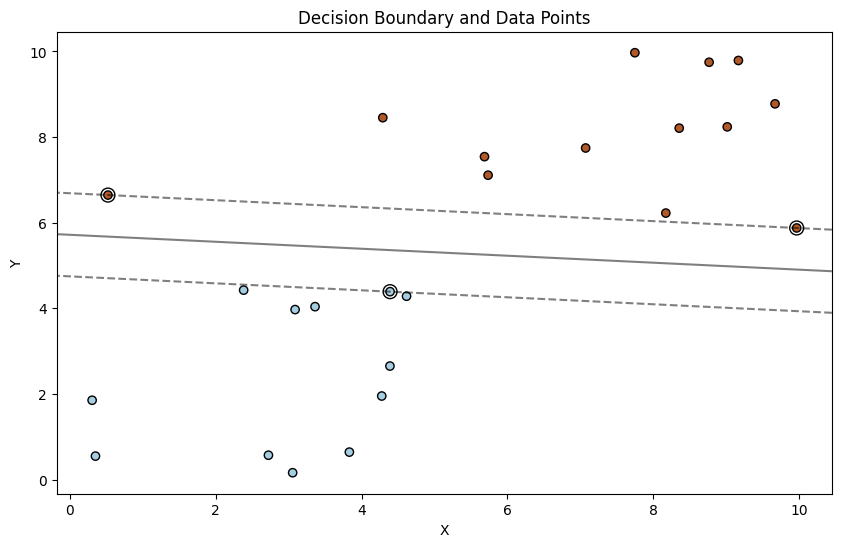

In [ ]:


svm = SVC(kernel='linear')
svm.fit(X, y)

plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title('Decision Boundary and Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


#**When C is (100, 300, 700, 1000)**

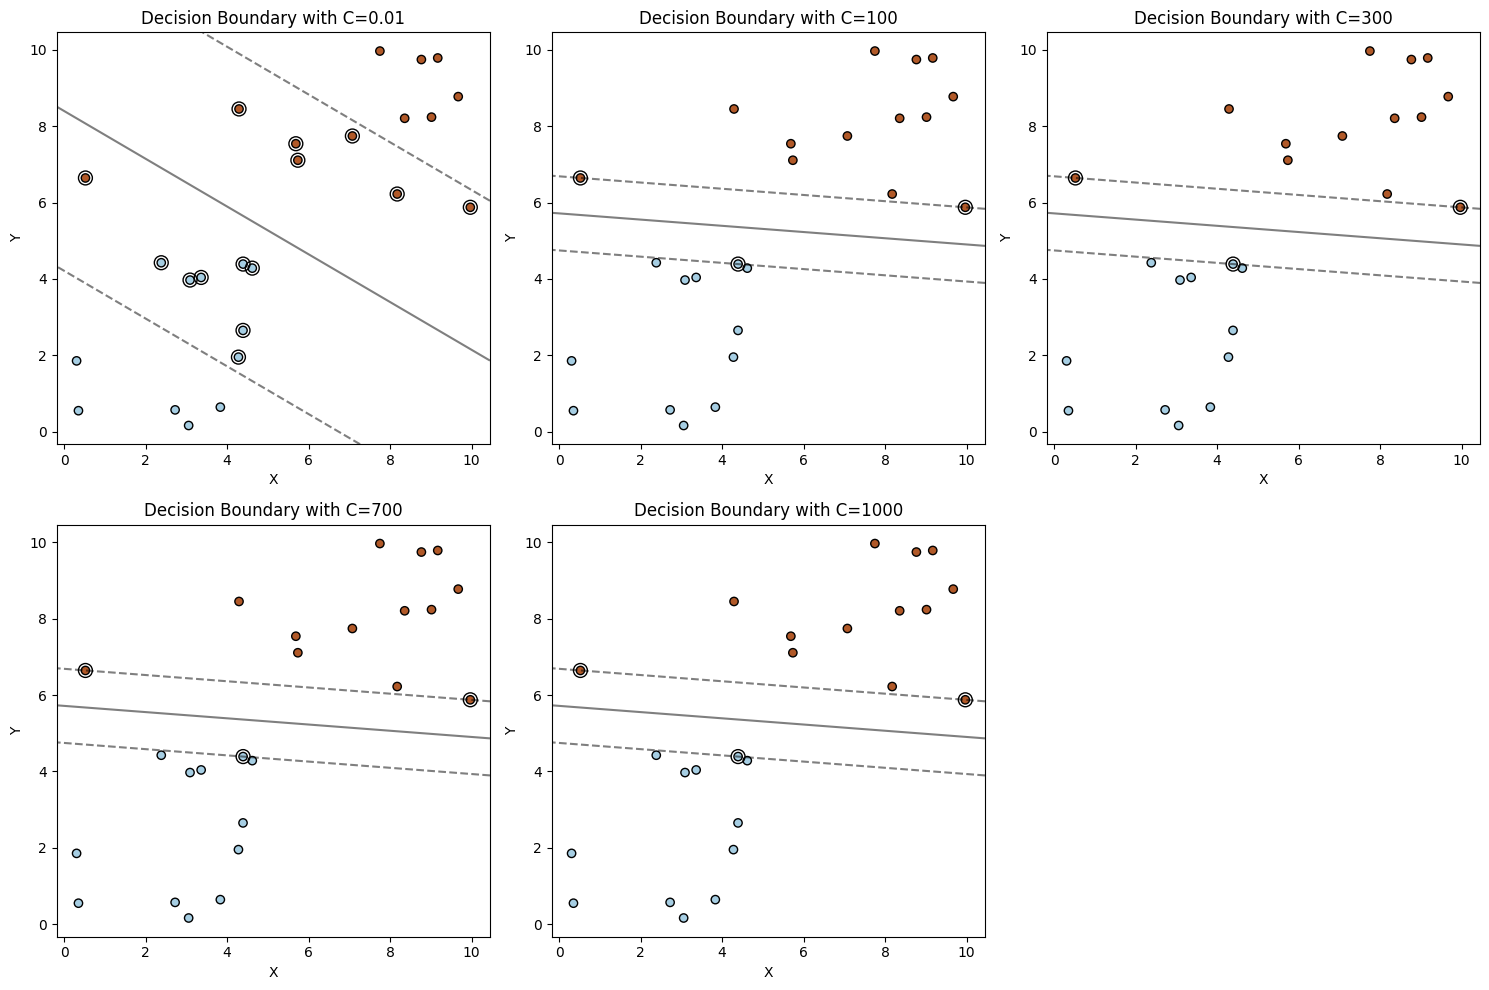

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

data = pd.read_csv("dataset-q-1.csv", header=None)
X = data.drop(2, axis=1)
y = data[2]

C_values = [0.01, 100, 300, 700, 1000]

plt.figure(figsize=(15, 10))
for i, C in enumerate(C_values, 1):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    plt.subplot(2, 3, i)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title(f'Decision Boundary with C={C}')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.tight_layout()
plt.show()


# **With Iris dataset**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

poly_svm = SVC(kernel='poly', degree=2)
poly_svm.fit(X_train, y_train)

gaussian_svm = SVC(kernel='rbf')
gaussian_svm.fit(X_train, y_train)

poly_pred = poly_svm.predict(X_test)
gaussian_pred = gaussian_svm.predict(X_test)

poly_accuracy = accuracy_score(y_test, poly_pred)
gaussian_accuracy = accuracy_score(y_test, gaussian_pred)

print("Accuracy with Polynomial Kernel:", poly_accuracy)
print("Accuracy with Gaussian Kernel:", gaussian_accuracy)

for C in [100, 200, 700]:
    for degree in [2, 3, 4]:
        poly_svm = SVC(kernel='poly', degree=degree, C=C)
        poly_svm.fit(X_train, y_train)
        poly_pred = poly_svm.predict(X_test)
        accuracy = accuracy_score(y_test, poly_pred)
        print("C =", C, ", Degree =", degree, ", Accuracy =", accuracy)

for C in [100, 200, 700]:
    for sigma in [0.1, 1, 10]:
        gaussian_svm = SVC(kernel='rbf', C=C, gamma=1/(2*sigma**2))
        gaussian_svm.fit(X_train, y_train)
        gaussian_pred = gaussian_svm.predict(X_test)
        accuracy = accuracy_score(y_test, gaussian_pred)
        print("C =", C, ", Sigma =", sigma, ", Accuracy =", accuracy)


Accuracy with Polynomial Kernel: 0.8333333333333334
Accuracy with Gaussian Kernel: 0.9
C = 100 , Degree = 2 , Accuracy = 0.9
C = 100 , Degree = 3 , Accuracy = 0.8
C = 100 , Degree = 4 , Accuracy = 0.8666666666666667
C = 200 , Degree = 2 , Accuracy = 0.9
C = 200 , Degree = 3 , Accuracy = 0.8
C = 200 , Degree = 4 , Accuracy = 0.8666666666666667
C = 700 , Degree = 2 , Accuracy = 0.8666666666666667
C = 700 , Degree = 3 , Accuracy = 0.8
C = 700 , Degree = 4 , Accuracy = 0.9
C = 100 , Sigma = 0.1 , Accuracy = 0.6666666666666666
C = 100 , Sigma = 1 , Accuracy = 0.8666666666666667
C = 100 , Sigma = 10 , Accuracy = 0.9
C = 200 , Sigma = 0.1 , Accuracy = 0.6666666666666666
C = 200 , Sigma = 1 , Accuracy = 0.8666666666666667
C = 200 , Sigma = 10 , Accuracy = 0.9
C = 700 , Sigma = 0.1 , Accuracy = 0.6666666666666666
C = 700 , Sigma = 1 , Accuracy = 0.8666666666666667
C = 700 , Sigma = 10 , Accuracy = 0.9


# **By using grid search**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.read_csv("dataset-q-4.csv", header=None)
X = data.drop(2, axis=1)
y = data[2]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

optimal_C = best_params['C']
optimal_kernel = best_params['kernel']


print("Optimal C:", optimal_C)

print("Optimal Kernel:", optimal_kernel)

print("Accuracy on testing set:", accuracy)


Optimal C: 100
Optimal Kernel: poly
Accuracy on testing set: 0.9615384615384616
